### Wybrano 25 latke, 5 letni okres inwestycji

In [248]:
using DataFrames
using Plots
using StatsBase
using LinearAlgebra

In [251]:
using MarketData, TimeSeries
# plotly();

In [252]:
#Wybór skrótów amerykańskich spółek
tickers = ["CSCO", "AAPL", "AMZN", "C", "JNJ", "MET", "NKE", "NYT", "PG", "DIS", "WMT"]

11-element Vector{String}:
 "CSCO"
 "AAPL"
 "AMZN"
 "C"
 "JNJ"
 "MET"
 "NKE"
 "NYT"
 "PG"
 "DIS"
 "WMT"

In [253]:
#pętla tworząca TimeArray z danymi rzeczywistymi z Yahoo dla wybranych spółek
close_price = []
for (idx, ticker) in enumerate(tickers)
    if idx == 1
        ta = yahoo(Symbol(ticker), YahooOpt(period1 = now() - Year(5)- Day(1)))
        close_price = ta[:Close]
    else
        ta1 = yahoo(Symbol(ticker), YahooOpt(period1 = now() - Year(5)- Day(1)))
        close_price = merge(close_price, ta1[:Close])  
    end
end

In [254]:
# zmiana TimeArray -> Dataframe
stocks = DataFrame(close_price)

Row,timestamp,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Clos_10
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019-01-09,43.32,38.3275,82.971,56.38,128.93,43.5,76.59,23.75,90.95,112.67,94.89
2,2019-01-10,43.24,38.45,82.811,56.44,129.71,43.37,76.42,23.77,91.17,112.8,94.96
3,2019-01-11,43.49,38.0725,82.028,56.69,129.75,43.72,76.04,24.28,91.77,112.65,94.84
4,2019-01-14,43.21,37.5,80.8605,58.93,128.28,43.97,76.09,24.55,91.15,112.42,94.95
5,2019-01-15,44.02,38.2675,83.728,61.38,129.36,44.06,77.88,24.61,92.01,111.76,96.25
6,2019-01-16,43.96,38.735,84.189,62.19,128.04,44.87,77.68,25.15,91.37,110.91,96.35
7,2019-01-17,44.21,38.965,84.661,62.47,129.09,45.05,79.13,25.5,90.64,111.01,96.74
8,2019-01-18,45.03,39.205,84.81,63.12,130.69,45.31,80.45,25.18,91.42,111.04,97.73
9,2019-01-22,44.78,38.325,81.6085,61.85,128.8,44.87,80.75,24.76,90.44,110.6,97.49


In [255]:
#Utworzenie wektora z nazwami kolumn powstałego DF
column_names = ["Date", "CSCO", "AAPL", "AMZN", "C", "JNJ", "MET", "NKE", "NYT", "PG", "DIS", "WMT"]

12-element Vector{String}:
 "Date"
 "CSCO"
 "AAPL"
 "AMZN"
 "C"
 "JNJ"
 "MET"
 "NKE"
 "NYT"
 "PG"
 "DIS"
 "WMT"

In [256]:
#zmiana nazw kolumn - odpowiednio na nazwy spółek
stocks = DataFrames.rename(stocks, column_names)

Row,Date,CSCO,AAPL,AMZN,C,JNJ,MET,NKE,NYT,PG,DIS,WMT
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019-01-09,43.32,38.3275,82.971,56.38,128.93,43.5,76.59,23.75,90.95,112.67,94.89
2,2019-01-10,43.24,38.45,82.811,56.44,129.71,43.37,76.42,23.77,91.17,112.8,94.96
3,2019-01-11,43.49,38.0725,82.028,56.69,129.75,43.72,76.04,24.28,91.77,112.65,94.84
4,2019-01-14,43.21,37.5,80.8605,58.93,128.28,43.97,76.09,24.55,91.15,112.42,94.95
5,2019-01-15,44.02,38.2675,83.728,61.38,129.36,44.06,77.88,24.61,92.01,111.76,96.25
6,2019-01-16,43.96,38.735,84.189,62.19,128.04,44.87,77.68,25.15,91.37,110.91,96.35
7,2019-01-17,44.21,38.965,84.661,62.47,129.09,45.05,79.13,25.5,90.64,111.01,96.74
8,2019-01-18,45.03,39.205,84.81,63.12,130.69,45.31,80.45,25.18,91.42,111.04,97.73
9,2019-01-22,44.78,38.325,81.6085,61.85,128.8,44.87,80.75,24.76,90.44,110.6,97.49


In [257]:
select!(stocks, Not(:Date)) # wylaczenie kolumny z datą z głownego DF
stock_to_analyse = first(stocks,1260)
stock_to_analyse1 = first(stock_to_analyse,630) #dataframe zawierajacy dane z okresu 1
stock_to_analyse2 = last(stock_to_analyse,629) #dataframe zawierajacy dane z okresu 2
intervals = [1260,630,629]
choosen_interval = intervals[3] # wybor interwału (cały badany okres, pierwsza polowa okresu, druga polowa okresu)
analysed_df = stock_to_analyse2 # wybór horyzontu czasowego 

Row,CSCO,AAPL,AMZN,C,JNJ,MET,NKE,NYT,PG,DIS,WMT
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,53.23,144.5,185.928,69.44,169.48,59.56,161.82,43.16,137.14,184.38,140.05
2,53.32,145.64,183.868,68.37,169.27,58.68,161.59,42.98,136.97,183.65,140.58
3,54.09,149.15,184.084,68.17,170.42,58.24,161.54,42.82,137.98,183.42,141.55
4,53.65,148.48,181.56,68.45,168.37,58.64,161.69,42.81,139.16,184.15,141.66
5,53.7,146.39,178.682,66.9,168.1,57.58,159.85,42.71,140.51,179.31,141.56
6,53.06,142.45,177.48,65.08,166.88,55.86,157.87,42.69,140.44,172.95,141.23
7,53.58,146.15,178.66,66.29,168.45,57.7,159.74,42.28,139.69,176.75,141.87
8,53.88,145.4,179.26,67.89,169.49,58.99,161.08,42.1,139.2,176.89,141.17
9,54.54,146.8,181.902,66.93,169.98,57.81,163.68,42.04,137.8,175.13,141.27


In [258]:
describe(analysed_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,CSCO,51.0449,39.27,50.85,63.96,0,Float64
2,AAPL,161.827,125.02,160.25,198.11,0,Float64
3,AMZN,133.207,81.82,132.21,185.928,0,Float64
4,C,52.614,38.24,49.56,74.3,0,Float64
5,JNJ,166.501,145.6,165.7,186.01,0,Float64
6,MET,64.0907,49.12,63.54,76.95,0,Float64
7,NKE,124.092,83.12,117.87,177.51,0,Float64
8,NYT,40.0948,27.9,40.34,55.8,0,Float64
9,PG,147.455,123.76,146.82,164.21,0,Float64


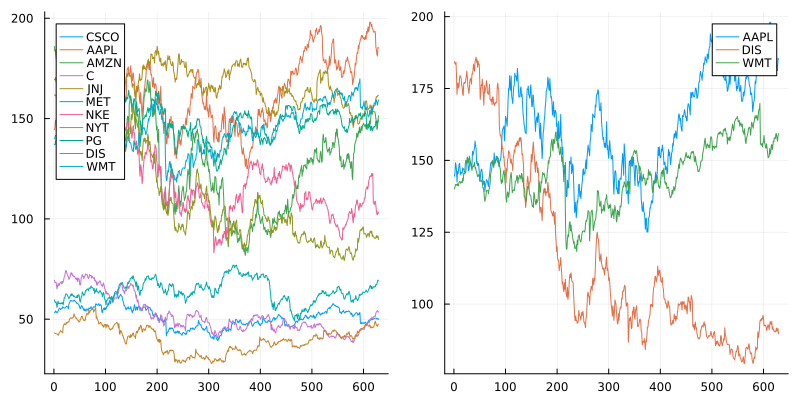

In [259]:
#dynamika zmian cen akcji spółek oraz 3 wybranych
px = plot(Matrix(analysed_df), labels = permutedims(names(analysed_df)),legend=:topleft)
py = plot(Matrix(analysed_df[!,Not(1,3,4,5,6,7,8,9)]),labels = permutedims(names(analysed_df[!,Not(1,3,4,5,6,7,8,9)])),legend=:topright)
plot(px,py, layout = 2, size=(800,400))

In [260]:
# srednie stopy zwrotu do pierwszego okresu
returns = mapcols(col -> col/col[1], analysed_df)
first(returns, 10)

Row,CSCO,AAPL,AMZN,C,JNJ,MET,NKE,NYT,PG,DIS,WMT
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.00169,1.00789,0.988923,0.984591,0.998761,0.985225,0.998579,0.995829,0.99876,0.996041,1.00378
3,1.01616,1.03218,0.990085,0.981711,1.00555,0.977837,0.99827,0.992122,1.00613,0.994793,1.01071
4,1.00789,1.02754,0.97651,0.985743,0.993451,0.984553,0.999197,0.991891,1.01473,0.998753,1.0115
5,1.00883,1.01308,0.961028,0.963422,0.991858,0.966756,0.987826,0.989574,1.02457,0.972502,1.01078
6,0.996806,0.985813,0.954563,0.937212,0.984659,0.937878,0.97559,0.98911,1.02406,0.938008,1.00843
7,1.00658,1.01142,0.960909,0.954637,0.993923,0.968771,0.987146,0.979611,1.01859,0.958618,1.013
8,1.01221,1.00623,0.964139,0.977679,1.00006,0.99043,0.995427,0.97544,1.01502,0.959377,1.008
9,1.02461,1.01592,0.978346,0.963854,1.00295,0.970618,1.01149,0.97405,1.00481,0.949832,1.00871


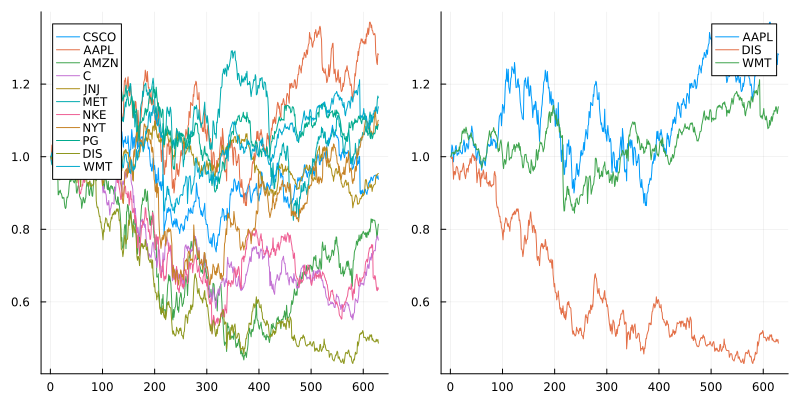

In [261]:
#wykresy przestawiajace średnie stopy zwrotu dla wszystkich spółek oraz dla 3 wybranych
p1 = plot(Matrix(returns), labels = permutedims(names(returns)), legend=:topleft)
p2 = plot(Matrix(returns[!,Not(1,3,4,5,6,7,8,9)]), labels = permutedims(names(returns[!,Not(1,3,4,5,6,7,8,9)])), legend=:topright)
plot(p1,p2, layout = 2, size=(800,400))

In [262]:
#dataframe zawierający zlogarytmowane stopy zwrotu
rates_of_return = log.(Matrix(analysed_df)) - log.(circshift(Matrix(analysed_df), (1,0)))
rates_of_return = DataFrame(rates_of_return,
    [tickers[i] for i in 1:size(rates_of_return)[2]])[2:end,:]

Row,CSCO,AAPL,AMZN,C,JNJ,MET,NKE,NYT,PG,DIS,WMT
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00168935,0.00785831,-0.0111388,-0.0155289,-0.00123981,-0.0148853,-0.00142241,-0.00417925,-0.00124036,-0.00396713,0.00377721
2,0.0143378,0.0238147,0.00117409,-0.00292962,0.00677087,-0.00752652,-0.000309492,-0.00372961,0.00734679,-0.00125315,0.0068763
3,-0.00816782,-0.00450223,-0.013806,0.00409895,-0.0121021,0.0068446,0.000928187,-0.00023354,0.00851566,0.00397202,0.000776816
4,0.000931514,-0.014176,-0.0159813,-0.0229045,-0.00160483,-0.0182417,-0.011445,-0.00233868,0.00965425,-0.0266345,-0.000706207
5,-0.0119897,-0.0272832,-0.00674976,-0.0275817,-0.00728405,-0.0303267,-0.012464,-0.000468384,-0.000498259,-0.0361136,-0.0023339
6,0.00975253,0.0256424,0.00662661,0.0184218,0.00936393,0.0324086,0.0117756,-0.00965054,-0.00535467,0.0217338,0.00452137
7,0.00558347,-0.00514493,0.00335548,0.0238497,0.00615501,0.0221108,0.00835362,-0.00426644,-0.00351397,0.00079176,-0.00494629
8,0.012175,0.00958261,0.0146281,-0.0142414,0.0028868,-0.0202062,0.0160121,-0.00142612,-0.0101083,-0.00999948,0.000708158
9,0.0125719,0.0119178,0.00510234,-0.00329245,0.010592,-0.00311851,0.0162409,0.0276818,0.0143379,0.00575054,0.00817762


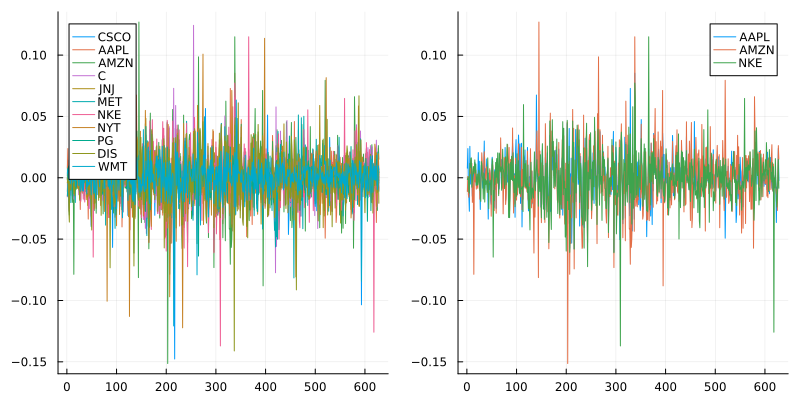

In [263]:
# wykresy przedstawiajace zlogarytmowane stopy zwrotu dla wszystkich spolek oraz 3 wybranych
p1 = plot(Matrix(rates_of_return), labels = permutedims(names(rates_of_return)), legend=:topleft)
p2 = plot(Matrix(rates_of_return[!,Not(1,4,5,6,8,9,10,11)]), labels = permutedims(names(rates_of_return[!,Not(1,4,5,6,8,9,10,11)])), legend=:topright)
plot(p1,p2, layout = 2, size=(800,400))

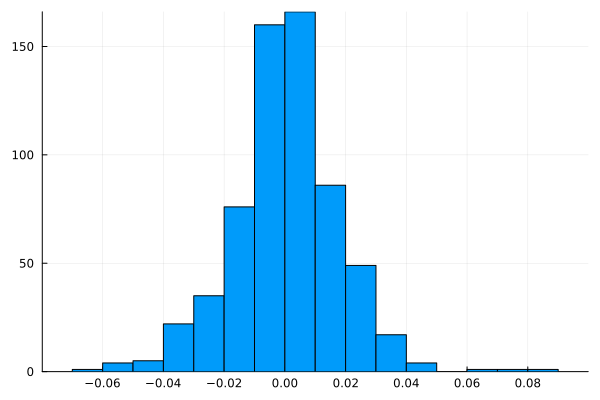

In [264]:
histogram(rates_of_return[:, 2], bins = 20, legend = false) # stopy zwrotu dla 2. spółki, czyli Apple

In [265]:
### Srednie i MNK

In [266]:
moving_average(vec,window) = [sum(@view vec[i:(i+window-1)])/window 
                            for i in 1:(length(vec)-(window-1))]
rollmeancol(df, window) =  mapcols(col -> moving_average(col,window),df)

rollmeancol (generic function with 1 method)

In [267]:
ma20  = rollmeancol(stocks,20)
ma50  = rollmeancol(stocks,50)
ma200  = rollmeancol(stocks,200);

In [268]:
least_squares(X,y) = (X = hcat(ones(size(X)[1]), X); (X'*X)^-1*X'*y)

least_squares (generic function with 1 method)

In [269]:
βs = least_squares(collect(1:size(analysed_df)[1]), analysed_df[!,:AMZN])

2-element Vector{Float64}:
 157.7138787760777
  -0.07779922045652166

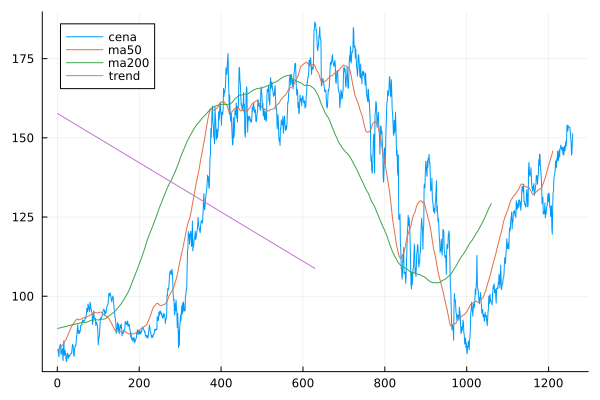

In [270]:
#wykres przedstawiający średnie kroczące oraz linię trendu 
trendline =  βs[1] .+ βs[2] * collect(1:size(analysed_df)[1]) 

plot(stocks[!, 3], label = "cena")
plot!(ma50[!, 3], label = "ma50")
plot!(ma200[!,3], label = "ma200")
plot!(trendline, label = "trend", legend=:topleft)

### Wariant 1

In [271]:
# 1 rok = 252 dni sesyjne - dzienna stopa zwrotu
r_min = 1.5 ^ (1/choosen_interval) - 1

0.0006448264250737967

### WARIANT 2: wariancja portfela nie może być wyższa niż połowa wariancji stóp zwrotu z akcji o najwyższej wariancji


In [273]:
# wyliczamy średnią i odchylenie standardowe stopy zwrotu dla każdego papieru i na tej podstawie wyznaczamy ograniczenie
r_mean = Array(combine(rates_of_return, names(rates_of_return) .=> mean))
r_std = Array(combine(rates_of_return, names(rates_of_return) .=> std)) #odchylenie standardowe

# ograniczenie wariancji:
var_max = 0.25(maximum(r_std)^2) #nasz cap na wariancje w 2. wariancie

sqrt(var_max * choosen_interval)


0.31260177273930956

#### Bazowy portfel funduszu

- tworzymy macierze kowariancji i korelacji na podstawie stóp zwrotu 
- przyjmujemy początkowe wagi dla portfela
- funkcje obliczające średni zwrot z portfela i wariancję portfela

(por. np. https://www.bankier.pl/wiadomosc/Dywersyfikacja-7337529.html)

In [274]:
#macierz kowiariancji i korelacji oraz wagi 
covar = cov(Matrix(rates_of_return))
corr = cor(Matrix(rates_of_return))
weights = ones(size(analysed_df)[2])/size(analysed_df)[2];

In [275]:
portfolio_mean(weights; r_mean = r_mean) =  sum(weights .* r_mean') # implementacja wzoru na oczekiwaną stopę zwrotu
portfolio_var(weights; covar = covar) = weights'*covar*weights # implementacja wariancji portfela 

portfolio_var (generic function with 1 method)

In [276]:
covar

11×11 Matrix{Float64}:
 0.000239036  0.000140096  0.000145052  …  0.000112564  7.13625e-5
 0.000140096  0.000309632  0.000267841     0.000177795  6.57134e-5
 0.000145052  0.000267841  0.00062143      0.000261263  8.43748e-5
 0.000100817  0.00013037   0.000170752     0.00018127   3.07974e-5
 4.55959e-5   4.57116e-5   3.48424e-5      2.87582e-5   4.05445e-5
 0.000101829  0.000113842  0.000120377  …  0.000148194  4.29525e-5
 0.00012995   0.000205582  0.000263687     0.000205729  7.12177e-5
 7.6497e-5    0.000127774  0.000179512     0.00015468   4.92982e-5
 6.80805e-5   6.87697e-5   4.93661e-5      4.81671e-5   5.82256e-5
 0.000112564  0.000177795  0.000261263     0.000379633  5.52821e-5
 7.13625e-5   6.57134e-5   8.43748e-5   …  5.52821e-5   0.000173489

In [277]:
corr

11×11 Matrix{Float64}:
 1.0       0.514958  0.376353  0.367365  …  0.389972  0.373667  0.350431
 0.514958  1.0       0.610601  0.417399     0.346112  0.51858   0.283528
 0.376353  0.610601  1.0       0.385892     0.175378  0.537897  0.256969
 0.367365  0.417399  0.385892  1.0          0.224933  0.524132  0.131727
 0.287004  0.252811  0.136021  0.210882     0.480001  0.143639  0.299564
 0.402105  0.394981  0.294814  0.695514  …  0.254825  0.464353  0.199091
 0.399137  0.554806  0.502309  0.424946     0.322611  0.501409  0.256762
 0.24038   0.352782  0.349851  0.322843     0.131671  0.38569   0.181837
 0.389972  0.346112  0.175378  0.224933     1.0       0.218933  0.391491
 0.373667  0.51858   0.537897  0.524132     0.218933  1.0       0.215411
 0.350431  0.283528  0.256969  0.131727  …  0.391491  0.215411  1.0

### OPTYMALIZACJA i model

In [ ]:
#W celu uniknięcia powtarzania kodu - odpowiednio do wariantu - wybieramy dataframe oraz analizowany okres

In [278]:
import Pkg

In [280]:
using JuMP,Ipopt

In [281]:
### Wariant 1
portfolio = Model(Ipopt.Optimizer)
set_silent(portfolio)
@variable(portfolio, x[1:size(rates_of_return)[2]] >= 0)
@objective(portfolio, Min, portfolio_var(x))
@constraint(portfolio, sum(x) == 1)
@constraint(portfolio, portfolio_mean(x) >= r_min)

-0.00010254898678845269 x[1] + 0.0003946381889892682 x[2] - 0.00032743583109942544 x[3] - 0.00041585246324871855 x[4] - 7.551767324870147e-5 x[5] + 0.00023934017205141605 x[6] - 0.0007233808026514763 x[7] + 0.0001522373635115042 x[8] + 0.00013527934725241313 x[9] - 0.0011478704296630636 x[10] + 0.00020517906672551766 x[11] ≥ 0.0006448264250737967

In [282]:
optimize!(portfolio)
objective_value(portfolio)
weights_opt = value.(x);
println(weights_opt)
println("Suma wag: ",sum(weights_opt))
println("Stopa zwrotu: ",(1 + portfolio_mean(weights_opt)) ^ choosen_interval - 1)
println("Odchylenie portfela: ",sqrt(portfolio_var(weights_opt)*choosen_interval))

[5.784860465238501e-9, 0.9999998788559912, 8.486577072317042e-10, -3.390876729039756e-10, 6.6981492279850945e-9, 4.123315322750374e-8, -3.0033406719957655e-9, 2.258469343046962e-8, 2.0428819294234982e-8, -4.932326899573447e-9, 3.18404368109451e-8]
Suma wag: 1.0000000000000062
Stopa zwrotu: 0.2816886189318648
Odchylenie portfela: 0.44131469569800846


In [283]:
var_max

0.00015535750130327337

In [284]:
### Wariant 2
portfolio = Model(Ipopt.Optimizer)
set_silent(portfolio)
@variable(portfolio, x[1:size(rates_of_return)[2]] >= 0)
@objective(portfolio, Max, portfolio_mean(x))
@constraint(portfolio, sum(x) == 1)
@constraint(portfolio, portfolio_var(x) <= var_max);

In [285]:
optimize!(portfolio)
objective_value(portfolio)
weights_opt2 = value.(x);
println(weights_opt2)
println("Suma wag: ",sum(weights_opt2))
println("Stopa zwrotu: ",(1 + portfolio_mean(weights_opt2)) ^ choosen_interval - 1)
println("Odch. stand. portfela: ",sqrt(portfolio_var(weights_opt2)*choosen_interval))

[2.6941225806650567e-6, 0.5296734504541197, 1.2979252141346715e-6, 1.398718821625335e-6, 4.917229958038641e-6, 0.15455840196235487, 8.734888359231615e-7, 1.663800920872757e-5, 0.0003233641481224861, 6.29667244056818e-7, 0.3154163342735399]
Suma wag: 1.0
Stopa zwrotu: 0.21585945352697777
Odch. stand. portfela: 0.31261194898397343


In [286]:
### SYMLUACJA 

In [287]:
function decompose(data)
    data = Matrix(data)
    data_r = (log.(data) - log.(circshift(data, (1,0))))[2:end,:]
    mean(data_r), std(data_r), cholesky(cor(data_r)).L
end

decompose (generic function with 1 method)

In [288]:
function model(data, horizon, weights)
    mean_r, std_r, L  = decompose(data)
    
    # początkowa wartość udziału:
    P0 = collect(data[end,:]) 
    
    # generujemy zwroty zakładając wielowymiarowy rozkład normalny
    rates = Array{Float64}(undef, horizon, size(data)[2]) 
    for day in 1:horizon
        rates[day,:] = L *randn(size(data)[2])* std_r .+ mean_r
    end
    rates
    r_cum = exp.(transpose(sum(rates, dims = 1)))
    V = sum(weights .* P0 .* r_cum)
end



model (generic function with 1 method)

In [289]:
function run(iter, data, horizon, weights)
    V = []    
    for i in 1:iter
        push!(V, model(data, horizon, weights))
    end
    return V
end

run (generic function with 1 method)

In [290]:
initval2 = sum(collect(analysed_df[end,:]) .* weights_opt2)

159.06166552593345

In [291]:
endval2 = run(1000, analysed_df, choosen_interval, weights_opt2)
prc_rt2 = (endval2 .- initval2)/initval2*100
println(mean(prc_rt2))
println(extrema(prc_rt2))

3.364121846602957
(-65.7054344801861, 171.23467025266513)


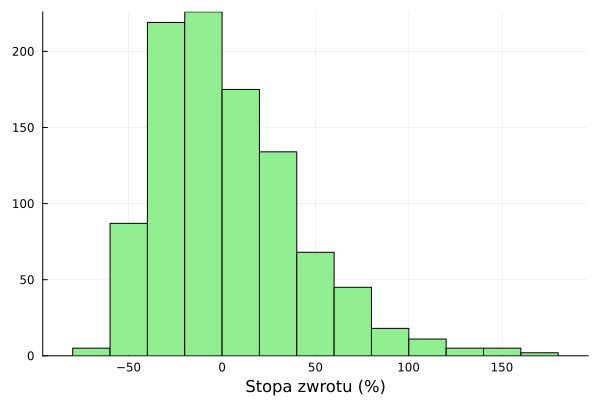

In [292]:
histogram(prc_rt2, 
    legend = false, 
    xlabel = "Stopa zwrotu (%)", 
    color="lightgreen",
    bins = 20)

In [293]:
#VAR 1%
percentile(prc_rt2, 1)

-57.50178178808632

In [294]:
#VAR 10%
percentile(prc_rt2, 10)

-39.057781345029966